In [2]:
import os
import sys

import pandas as pd
import numpy as np


cd = os.getcwd()
print(cd)
# data is located: /Users/lucazosso/Desktop/Luca_Sandbox_Env/uber_project/ds/uber.csv so I have to go back 1 folder and then go to the ds folder
# Go one folder back and then to the ds folder
data_path = os.path.join(os.path.dirname(cd), 'ds', 'uber.csv')
print(data_path)




/Users/lucazosso/Desktop/Luca_Sandbox_Env/uber_project/notebooks
/Users/lucazosso/Desktop/Luca_Sandbox_Env/uber_project/ds/uber.csv


* key - a unique identifier for each trip
* fare_amount - the cost of each trip in usd
* pickup_datetime - date and time when the meter was engaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged

In [3]:
df = pd.read_csv(data_path)

print(df.shape)
df.info()

(200000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [6]:
df['pickup_datetime'] = df['pickup_datetime'].apply(lambda x: x[: len('2015-05-07 19:52:06')])
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Date'] = df['pickup_datetime'].dt.day
df['Hour'] = df['pickup_datetime'].dt.hour
df['Day_of_week'] = df['pickup_datetime'].dt.dayofweek
df.drop('pickup_datetime', axis=1, inplace=True)
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Hour,Day_of_week
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,3
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,28,10,6
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,14,1,4
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,29,0,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,20,14,2


In [7]:
# Feature Engineering
# Using the haversine formula to calculate the distance between two points on the Earth given their latitude and longitude
# The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes.

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # radius of Earth in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    res = R * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    return np.round(res, 2)  # returns distance in kilometers

# Calculating the distance
df['distance'] = haversine_distance(df['pickup_latitude'], df['pickup_longitude'],
                                    df['dropoff_latitude'], df['dropoff_longitude'])



print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   Year               199999 non-null  int32  
 7   Month              199999 non-null  int32  
 8   Date               199999 non-null  int32  
 9   Hour               199999 non-null  int32  
 10  Day_of_week        199999 non-null  int32  
 11  distance           199999 non-null  float64
dtypes: float64(6), int32(5), int64(1)
memory usage: 16.0 MB
None


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Hour,Day_of_week,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,3,1.68
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4,2.46
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,0,5.04
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,4,1.66
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,3,4.48


# Modeling

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from datetime import datetime
import tensorflow as tf

In [9]:
X = df[['passenger_count', 'Year', 'Month', 'Date', 'Hour', 'Day_of_week', 'distance']]
print(X.columns)
y = df['fare_amount']

seed = 96
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Index(['passenger_count', 'Year', 'Month', 'Date', 'Hour', 'Day_of_week',
       'distance'],
      dtype='object')


In [10]:
# Building the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer for regression

/Users/lucazosso/Library/Caches/pypoetry/virtualenvs/uber-project-3DLrae9I-py3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss=MeanSquaredError(), 
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [12]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Evaluate the model
loss, rmse = model.evaluate(X_test, y_test)
print(f"Test RMSE: {rmse}")

# Making predictions
y_pred = model.predict(X_test)

Epoch 1/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 3s 494us/step - loss: 101.9170 - root_mean_squared_error: 10.0756 - val_loss: 32.6404 - val_root_mean_squared_error: 5.7132
Epoch 2/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 2s 443us/step - loss: 33.0144 - root_mean_squared_error: 5.7389 - val_loss: 29.2418 - val_root_mean_squared_error: 5.4076
Epoch 3/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 3s 499us/step - loss: 31.1321 - root_mean_squared_error: 5.5737 - val_loss: 28.8814 - val_root_mean_squared_error: 5.3741
Epoch 4/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 2s 466us/step - loss: 26.7999 - root_mean_squared_error: 5.1737 - val_loss: 27.9368 - val_root_mean_squared_error: 5.2855
Epoch 5/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 2s 453us/step - loss: 30.6223 - root_mean_squared_error: 5.5253 - val_loss: 27.3557 - val_root_mean_squared_error: 5.2303
Epoch 6/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 2s 440us/step - loss: 29.4124 - root_mean_squared_error: 5.4180 - val_loss: 27.4256 - val_root_mean_squared_error: 5.2369
Epoch 7/50
500

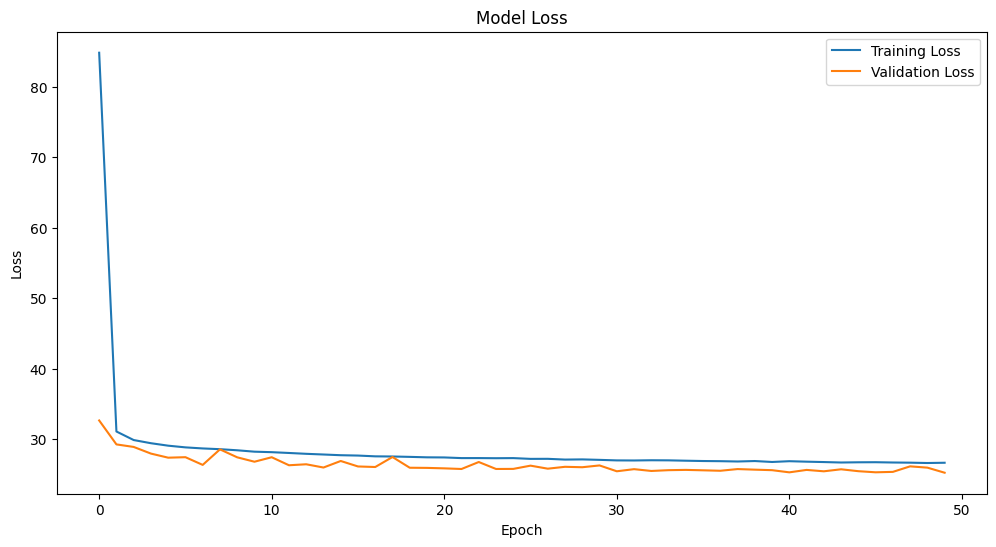

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [16]:
# Quick Evaluation of the model
# Comparing the actual values and the predicted values
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
# Compute RMSE
rmse = np.sqrt(np.mean((y_test - y_pred.flatten()) ** 2))
print(f"RMSE: {rmse}")

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred.flatten()) / y_test)) * 100
print(f"MAPE: {mape}")

RMSE: 5.021987460364685
MAPE: 23.993720972081164


Things to do next: -> the model pickle

-> a predict function, that maps input features to output predictions, using the model artifact.

-> A FastAPI wrapper around your Python code, to build the REST API, and

-> A Dockerfile to package everything in an isolated box.

In [32]:
# saving model
#model.save('model.keras')

# save the scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [36]:
df1 = pd.read_csv(data_path)

In [37]:
df1.iloc[86]

Unnamed: 0                              19137375
key                  2012-04-05 18:10:00.0000007
fare_amount                                  5.3
pickup_datetime          2012-04-05 18:10:00 UTC
pickup_longitude                      -73.971503
pickup_latitude                        40.760135
dropoff_longitude                     -73.961437
dropoff_latitude                       40.768975
passenger_count                                1
Name: 86, dtype: object

In [34]:
# generate some new data to test the model
new_data = pd.DataFrame({
    'passenger_count': [1],
    'Year': [2023],
    'Month': [5],
    'Date': [7],
    'Hour': [19],
    'Day_of_week': [3],
    'distance': [2.5]
})

#save it as csv
new_data.to_csv('new_data_for_test.csv', index=False)

In [19]:
json_path = "/Users/lucazosso/Desktop/Luca_Sandbox_Env/uber_project/ds/data_preds_5s.json"

pd.read_json()

/var/folders/y5/f3yrmbzn2jq1rcxqy582qldm0000gn/T/ipykernel_33184/2512197688.py:6: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  json_objects = [pd.read_json(line, typ='series') for line in json_lines]
/var/folders/y5/f3yrmbzn2jq1rcxqy582qldm0000gn/T/ipykernel_33184/2512197688.py:6: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  json_objects = [pd.read_json(line, typ='series') for line in json_lines]
/var/folders/y5/f3yrmbzn2jq1rcxqy582qldm0000gn/T/ipykernel_33184/2512197688.py:6: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  json_objects = [pd.read_json(line, typ='series') for line in json_lines]
/var/folders/y5/f3yrmb

In [23]:
test = {"input_data": 
    {"pickup_datetime": ["2011-10-13 18:15:00 UTC"], "pickup_longitude": [-73.98870699999999], "pickup_latitude": [40.733082], "dropoff_longitude": [-73.971275], "dropoff_latitude": [40.711017], "passenger_count": [1]
     }, 
    "predicted_uber_fare_price": 
        {"predicted_uber_fare_price": [[9.70079231262207]]
         }
        }

# parse test to a dataframe
df_input = pd.DataFrame(test['input_data'])
df_preds = pd.DataFrame(test['predicted_uber_fare_price'])
# drop the list of lists
df_preds = df_preds.map(lambda x: x[0])
# merge the two dataframes
df_test = pd.concat([df_input, df_preds], axis=1)

df_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,predicted_uber_fare_price
0,2011-10-13 18:15:00 UTC,-73.988707,40.733082,-73.971275,40.711017,1,9.700792


In [40]:
import json
predictions_json_path = '/Users/lucazosso/Desktop/Luca_Sandbox_Env/uber_project/ds/data_preds_5s.json'

data = pd.read_json(predictions_json_path)

#remove the list on all the variable except the last one
data = data.map(lambda x: x[0] if isinstance(x, list) else x)
data



,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,predicted_uber_fare_price
0,2015-03-26 08:49:56 UTC,-74.002921,40.774162,-74.003454,40.727583,6,13.645775
1,2014-11-06 20:50:22 UTC,-73.963160,40.759015,-73.967761,40.717585,1,15.696011
2,2013-10-24 21:40:16 UTC,-73.953865,40.744587,-74.014144,40.754025,1,17.000601
3,2009-03-20 09:46:20 UTC,-73.991226,40.741580,-73.981911,40.781316,1,12.844482
4,2012-02-21 20:18:47 UTC,-73.991575,40.788128,-73.988247,40.745713,1,12.386467
5,2010-06-09 17:10:14 UTC,-73.975960,0.000000,-73.973108,40.757732,1,9.178244
6,2011-05-15 09:15:09 UTC,-73.953621,40.764952,-73.906418,40.745537,6,8.411745
7,2014-09-18 07:05:47 UTC,-74.008373,40.775805,-73.988354,40.774812,2,7.052118
8,2013-01-16 08:45:05 UTC,-73.986315,40.757355,-73.972061,40.747877,1,7.587310
